## Загрузка библиотек

In [1]:
import pandas as pd

In [2]:
! wget https://raw.githubusercontent.com/jbr-ai-labs/ml-intro/main/hw_EDA_data/covid.csv
! wget https://raw.githubusercontent.com/jbr-ai-labs/ml-intro/main/hw_EDA_data/hr.csv

--2022-02-13 14:21:47--  https://raw.githubusercontent.com/jbr-ai-labs/ml-intro/main/hw_EDA_data/covid.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 459264 (448K) [text/plain]
Сохранение в: «covid.csv.1»

covid.csv.1         100%[===================>] 448,50K  --.-KB/s    за 0,1s    

2022-02-13 14:21:48 (2,94 MB/s) - «covid.csv.1» сохранён [459264/459264]

--2022-02-13 14:21:48--  https://raw.githubusercontent.com/jbr-ai-labs/ml-intro/main/hw_EDA_data/hr.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... соединение установлено.
HTTP-запрос от

## Загрузка данных

### Задание 1 (0.5 балла)

Для начала работы нам необходимо научиться читать набор данных. В данном домашнем задании мы поработаем с двумя наборами данных.

__covid.csv__ ([источник](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)) - статистика по вакцинированию от COVID19 по разным странам. Для данного датасета нет конкретной предсказательной переменной.

__hr.csv__ ([источник](https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists)) - набор данных большего размера. Он содержит статистику по людям, проходящим курсы по Big Data & ML. _Target_ - 1 или 0, сменил ли человек работу после прохождения курсов - или нет.

Реализуйте методы `read_covid_dataset` и `read_hr_dataset`. Каждый из них принимает на вход путь к набору данных и возвращает выборку `X` и соответствующие метки `y`. В случае _covid_ датасета `y` возвращается как `None`. 

In [3]:
def read_covid_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    df = pd.read_csv(path_to_csv)
    return df, None


def read_hr_dataset(path_to_csv):
    # Возвращает пару из X и y. X - массив векторов. y - соответствующие векторам метки
    df = pd.read_csv(path_to_csv)
    return df, df["target"]

In [4]:
COVID_DATA_PATH = "covid.csv"
HR_DATA_PATH = "hr.csv"

In [110]:
X_covid, _ = read_covid_dataset(COVID_DATA_PATH)
X_hr, y_hr = read_hr_dataset(HR_DATA_PATH)

## EDA

### Задание 2 (3.5 балла)

Выполните задание для датасетa _hr_.

Для дальнейшей работы с данными нужно обработать пропущенные значения в датасете.
Существуют различные стратегии обработки пропущенных данных.

#### 1. (0.5 балла)

Для числовых признаков постройте распределения признаков. Для категориальных признаков выведите статистику по количеству значений признака.

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


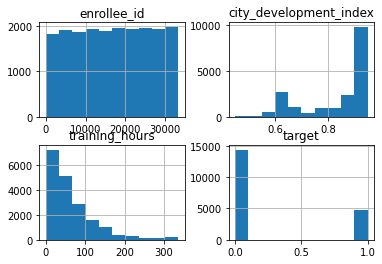

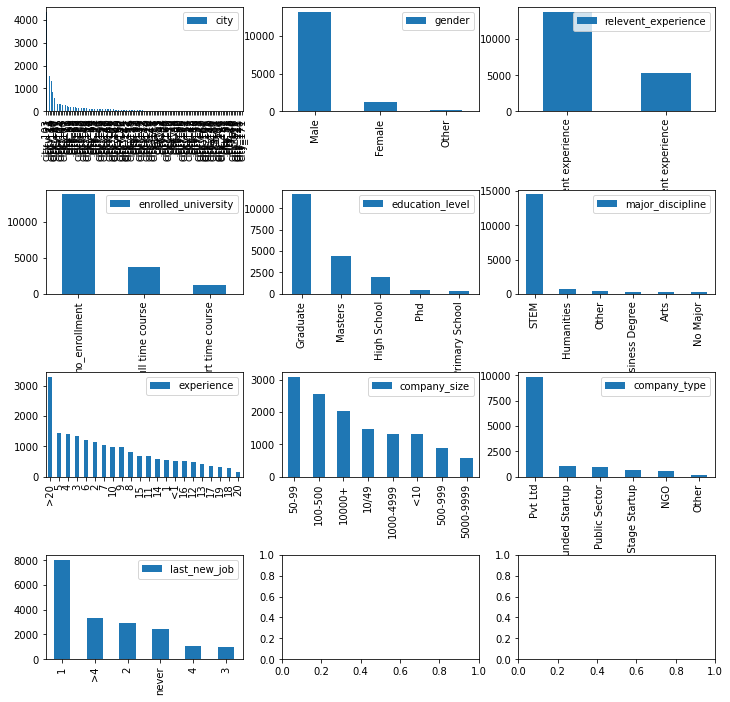

In [63]:
from pandas.api.types import is_numeric_dtype
from matplotlib import pyplot as plt

def hist_categorial_data(df):
    COLUMNS = 3
    categorial = [col for col in df.columns if not is_numeric_dtype(df[col])]
    fig, axs = plt.subplots((len(categorial)+COLUMNS-1)//COLUMNS, COLUMNS, figsize=(12, 12))
    plt.subplots_adjust(hspace=0.75)
    for i, col in enumerate(categorial):
        ax = axs[i//COLUMNS][i%COLUMNS]
        df[col].value_counts().plot(kind='bar', label=col, ax=ax)
        ax.legend()

X_hr.hist()
hist_categorial_data(X_hr)
X_hr.describe()

#### 2. (0.5 балла)
Удалите все строки, где есть хотя бы одно пропущенное значение признака. Насколько сильно уменьшился размер датасета? Как изменились распределения признаков/статистика по количеству значений признаков?

In [61]:
print(f'Исходный размер датасета hr {len(X_hr)}')

Исходный размер датасета hr 19158


In [27]:
X_hr_dropna = X_hr[~X_hr.isna().any(axis=1)]

Pазмер датасета hr без NaN 8955


,enrollee_id,city_development_index,training_hours,target
count,8955.000000,8955.000000,8955.000000,8955.000000
mean,16869.638749,0.844570,65.074930,0.165606
std,9963.804718,0.116178,60.235087,0.371747
min,2.000000,0.448000,1.000000,0.000000
25%,8150.000000,0.794000,23.000000,0.000000
50%,16924.000000,0.910000,47.000000,0.000000
75%,25902.000000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


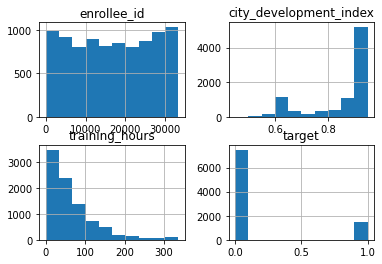

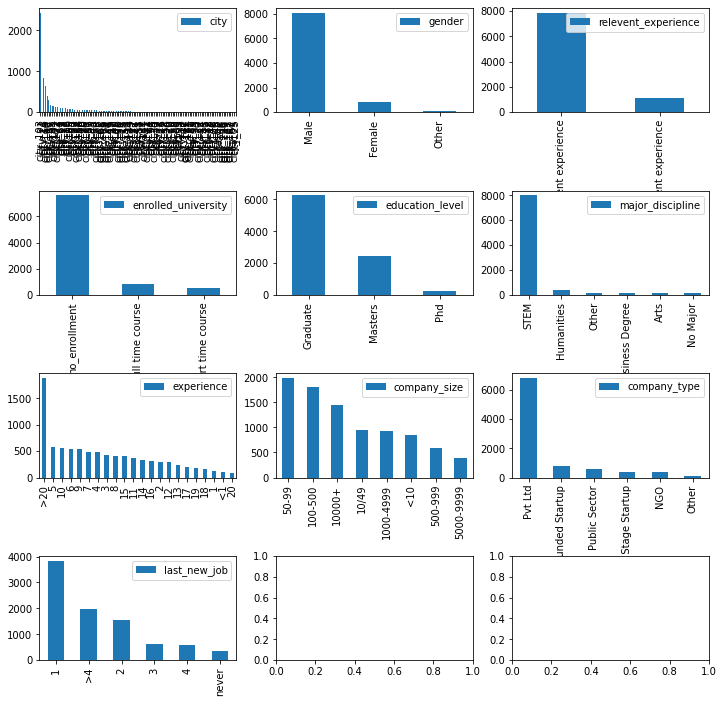

In [64]:
print(f'Pазмер датасета hr без NaN {len(X_hr_dropna)}')
X_hr_dropna.hist()
hist_categorial_data(X_hr_dropna)
X_hr_dropna.describe()

_Датасет сократился в два раза, у ряда признаков (enrollee_id, target, city, enrolled_university, education_level) ощутимо изменилось распределение._

Давайте попробуем избежать сокращения размера датасета.

In [66]:
for col in X_hr.columns:
    print(f"{col}: {sum(X_hr[col].isna())} NaNs")

enrollee_id: 0 NaNs
city: 0 NaNs
city_development_index: 0 NaNs
gender: 4508 NaNs
relevent_experience: 0 NaNs
enrolled_university: 386 NaNs
education_level: 460 NaNs
major_discipline: 2813 NaNs
experience: 65 NaNs
company_size: 5938 NaNs
company_type: 6140 NaNs
last_new_job: 423 NaNs
training_hours: 0 NaNs
target: 0 NaNs


#### 3.  (1 балл)
Для числовых признаков заполните пропущенные данные средним/медианой/модой данного признака. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

#### 4.  (1 балл)
Для категориальных признаков заполните пропущенные значения самой встречающейся категорией или создайте отдельную категорию пропущенных значений. Объясните свой выбор. (Часть строк с NaN значениями можно удалить, если размер датасета уменьшится <15%)

_Ваш ответ_

In [75]:
def fill_na(X, y):
    # Возвращает данные без NaN значений
    X_fill = X.fillna({
        "gender": "Unknown", # пропусков много, значение по умолчанию не очевидно
        # enrolled_university не заполняем, пропусков мало, значение по умолчанию не очевидно
        "education_level": X["education_level"].mode(), # пропусков мало, на значениях определён порядок
        "major_discipline": "Unknown", # пропусков много, значение по умолчанию не очевидно
        # experience не заполняем, пропусков очень мало
        "company_size": "Unknown", # пропусков много, значение по умолчанию не очевидно
        "company_type": "Unknown", # пропусков много, значение по умолчанию не очевидно
        # last_new_job не заполняем, пропусков мало, какие ещё могут быть значения — не очевидно
    })
    return X_fill[~X_fill.isna().any(axis=1)], y

In [76]:
X_hr_fill, y_hr_fill = fill_na(X_hr, y_hr)

#### 5.  (0.5 балла)
Как изменились распределения признаков/статистика по количеству значений признаков после заполнения пропущенных данных?

Pазмер датасета hr без NaN 18014


,enrollee_id,city_development_index,training_hours,target
count,18014.000000,18014.000000,18014.000000,18014.000000
mean,16903.699734,0.831728,65.347896,0.245420
std,9665.557267,0.122115,60.059220,0.430348
min,1.000000,0.448000,1.000000,0.000000
25%,8528.750000,0.745000,23.000000,0.000000
50%,17012.500000,0.910000,47.000000,0.000000
75%,25326.250000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


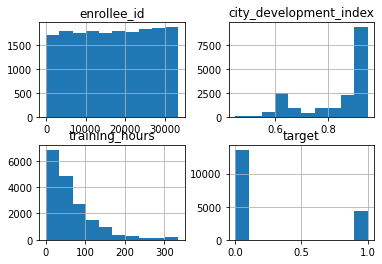

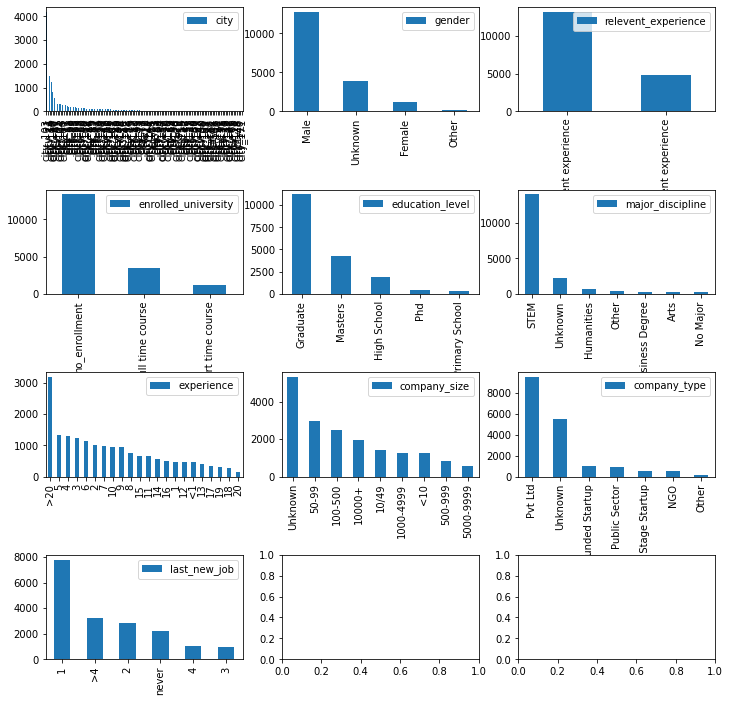

In [77]:
print(f'Pазмер датасета hr без NaN {len(X_hr_fill)}')
X_hr_fill.hist()
hist_categorial_data(X_hr_fill)
X_hr_fill.describe()

_Новые классы в категориальных признаках ощутимо изменили соответствующие распределения._

### Задание 3  (1 балл)

Выполните задание для датасета _covid_.

1. Найдите страну, для которой в датасете присутствует 46 дат со статистикой по вакцинации.
2. Постройте для этой страны график зависимости _total_vaccinations_ от _date_.
3. Заполните пропущенные данные о _total_vaccinations_ для этой страны. Объясните свой выбор.

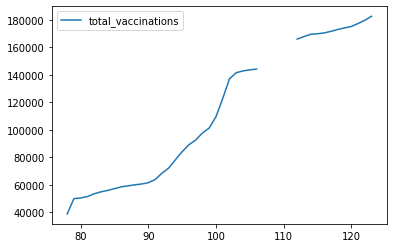

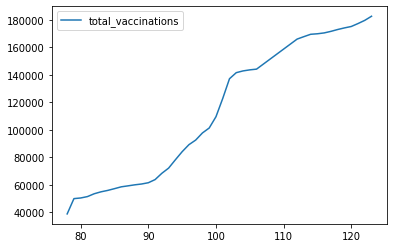

In [111]:
cnts = X_covid['country'].value_counts()
country = cnts[cnts == 46].keys()[0]
data = X_covid[X_covid['country'] == country][["date", "total_vaccinations"]].sort_values("date")
data.plot()
X_covid_interpolated = X_covid.copy()
X_covid_interpolated.loc[X_covid['country'] == country, 'total_vaccinations'] = X_covid[X_covid['country'] == country]['total_vaccinations'].interpolate()
data = X_covid_interpolated[X_covid_interpolated['country'] == country][["date", "total_vaccinations"]].sort_values("date")
data.plot();

_Нет оснований предполагать резкие изменения в количестве вакцинированных, можно сделать интерполяцию. Берём линейную как самую простую и достаточную для нашего случая._

### Задание  4 (0.5 балла)
Выполните задание для датасета _hr_.

Есть ли в данных выбросы? Если да, то скажите, какие и почему Вы считаете их выбросами?


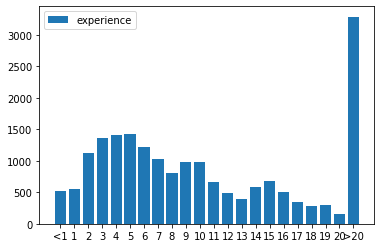

In [125]:
vc = X_hr['experience'].value_counts()
keys = ["<1"] + list(map(str, range(1, 21))) + [">20"]
plt.bar(keys, [vc[key] for key in keys], label='experience')
plt.legend();

_Выглядит подозрительным количество значений `>20` в столбце experience._

### Задание  5 (1 балл)
Выполните задание для датасета _hr_.

Закодируйте категориальные признаки при помощи One-hot encoding/Label encoding/Frequency encoding. Объясните свой выбор. (Обратите внимание, что некоторые категориальные признаки предполагают ранжирование в своих значениях)

In [165]:
categorial = [col for col in X_hr.columns if not is_numeric_dtype(X_hr[col])]
print(categorial)

def encode(X):
    # Возвращает данные без категориальных признаков
    X = X.copy()

    # one-hot encoding
    one_hot_columns = ['gender', 'relevent_experience', 'major_discipline', 'company_type']
    one_hot = pd.get_dummies(X_hr[one_hot_columns])
    X = X.drop(columns=one_hot_columns)
    X = X.merge(one_hot, left_index=True, right_index=True)
    
    # label encoding
    X["enrolled_university"] = X["enrolled_university"].replace({
        "no_enrollment": 0,
        "Part time course": 1,
        "Full time course": 2,
    })
    X["education_level"] = X["education_level"].replace({
        "Primary School": 1,
        "High School": 2,
        "Graduate": 3,
        "Masters": 4,
        "Phd": 5,
    })
    X["experience"] = X["experience"].replace({
        "<1": 0, 
        ">20": 21,
        **{str(i): i for i in range(1, 21)}
    })
    X["company_size_Unknown"] = (X["company_size"] == "Unknown") + 0
    X["company_size"] = X["company_size"].replace({
        "Unknown": -1,
        "<10": 0,
        "10/49": 1,
        "50-99": 2,
        "100-500": 3,
        "500-999": 4,
        "1000-4999": 5,
        "5000-9999": 6,
        "10000+": 7,
    })
    X["last_new_job"] = X["last_new_job"].replace({
        "never": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4": 4,
        ">4": 5,
    })
    
    # frequency encoding
    freqs = X["city"].value_counts() / len(X["city"])
    X["city"] = X["city"].replace(freqs)
    
    return X


['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


In [166]:
X_hr_encode = encode(X_hr_fill)
X_hr_encode

,enrollee_id,city,city_development_index,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,...,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_size_Unknown
0,8949,0.232819,0.920,0,3,21,-1,1,36,1.0,...,0,0,1,0,0,0,0,0,0,1
1,29725,0.003497,0.776,0,3,15,2,5,47,0.0,...,0,0,1,0,0,0,0,0,1,0
2,11561,0.136227,0.624,2,3,5,-1,0,83,0.0,...,0,0,1,0,0,0,0,0,0,1
4,666,0.006384,0.767,0,4,21,2,4,8,0.0,...,0,0,1,0,1,0,0,0,0,0
5,21651,0.001110,0.764,1,3,11,-1,1,24,1.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.007772,0.878,0,3,14,-1,1,42,1.0,...,0,0,0,0,0,0,0,0,0,1
19154,31398,0.232819,0.920,0,3,14,-1,4,52,1.0,...,0,0,1,0,0,0,0,0,0,1
19155,24576,0.232819,0.920,0,3,21,2,4,44,0.0,...,0,0,1,0,0,0,0,0,1,0
19156,5756,0.009160,0.802,0,2,0,4,2,97,0.0,...,0,0,0,0,0,0,0,0,1,0


_Признаки с порядком кодируем через label encoding. Остальные кодируем через one hot encoding. City кодируем frequency encoding, потому что разных значений слишком много, порядка нет, между значениями значительный перевес — попробуем извлечь информацию хотя бы из размера города._

### Задание  6 (1 балл)
Выполните задание для датасета _hr_.




#### 1.  (1 балл)
Реализуйте функцию undersampling

#### 2.  (1 балл)
Реализуйте функцию oversampling

In [183]:
def undersampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling
    min_freq = min(y.value_counts())
    sample = X.merge(y, left_index=True, right_index=True).sample(min_freq)
    return sample, sample["target_y"]

def oversampling(X, y):
    # Возвращает данные, сбалансированные методом undersampling
    max_freq = max(y.value_counts())
    sample = X.merge(y, left_index=True, right_index=True).sample(max_freq)
    return sample, sample["target_y"]

In [184]:
X_hr_under, y_hr_under = undersampling(X_hr_encode, y_hr_fill)

X_hr_over, y_hr_over = oversampling(X_hr_encode, y_hr_fill)

#### 3.  (1 балл)
Используйте _SMOTE_ для балансировки датасета.

Помимо методов _undersampling_ и _oversampling_ существует подход, генерирующий элементы класса-меньшинства, похожие на уже присутствующие в выборке данных. Такой метод называется _Synthetic Minority Oversampling Technique_ (SMOTE). 

Метод _SMOTE_ , реализованный в библиотеке `imblearn`, генерирует синтетические примеры при помощи __k-nearest neighbor__ алгоритма (подробнее об этом алгоритме будет рассказано на лекции).

In [ ]:
!python -m pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

smote = # YOUR_CODE
X_hr_SMOTE, y_hr_SMOTE = # YOUR_CODE

#### 4. (0.5 балла)
Как изменились распределения признаков при различных тактиках балансирования датасета?

In [92]:
# YOUR CODE

_Ваш ответ_